**Amit Davidpur** - 207496878

**Meshi Ben Oz** - 207287566

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Preprocessing

In [ ]:
# Upload csv of data from Kaggle
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col='id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [ ]:
# Convert the columns type to object to preform separate analysis on numeric vs. categorical data
cat_columns = ['hypertension', 'heart_disease','smoking_status','stroke']
df[cat_columns] = df[cat_columns].astype('object')

In [ ]:
# Descriptive statistics
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
# Check for duplications in the data
df.duplicated().sum()

0

In [ ]:
# Check for missing values in the data
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


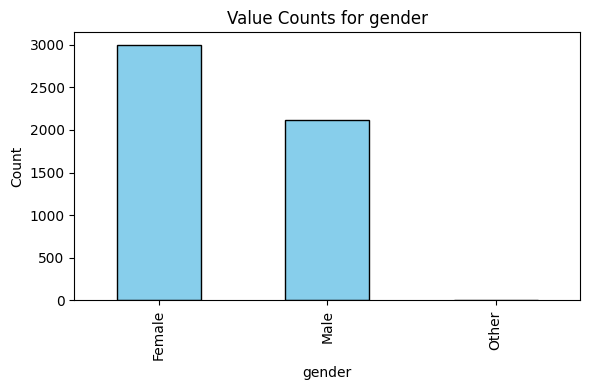

hypertension
0    4612
1     498
Name: count, dtype: int64


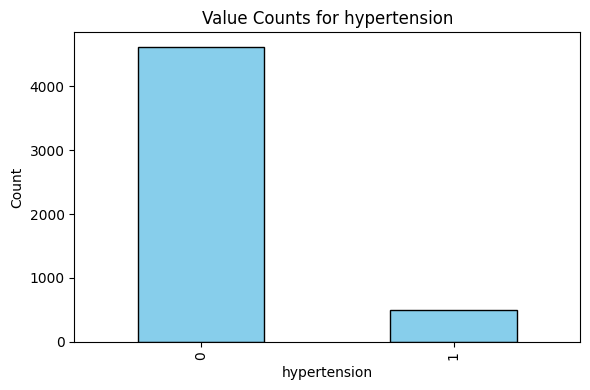

heart_disease
0    4834
1     276
Name: count, dtype: int64


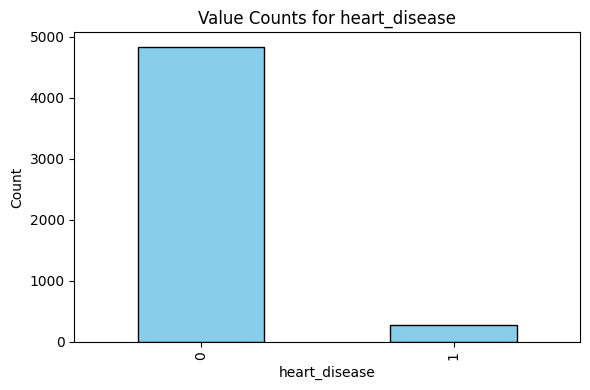

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


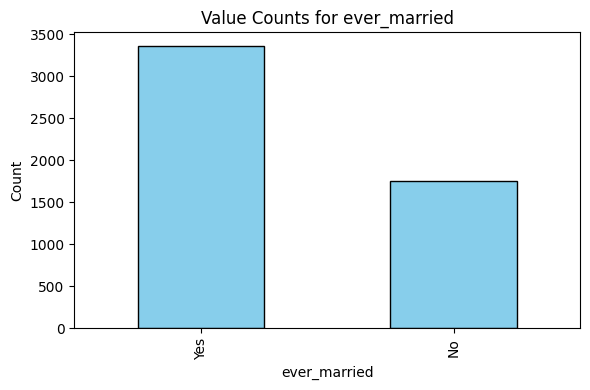

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


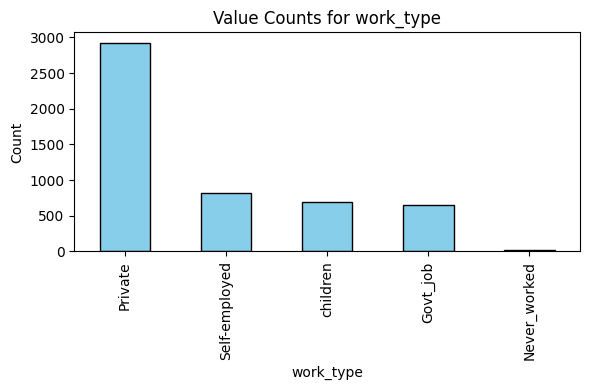

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


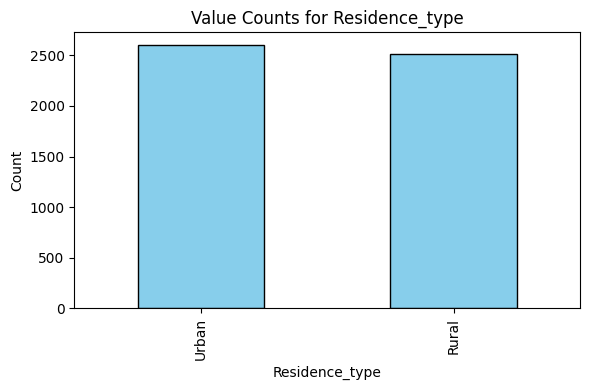

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


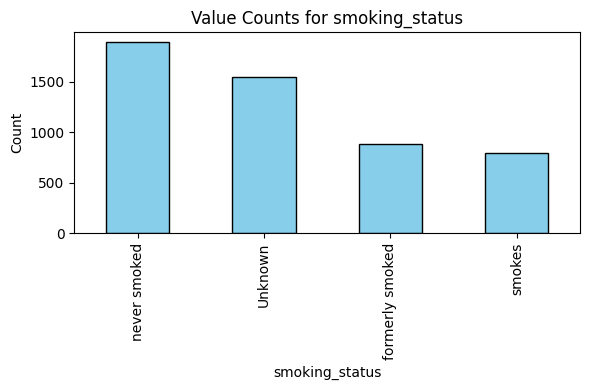

stroke
0    4861
1     249
Name: count, dtype: int64


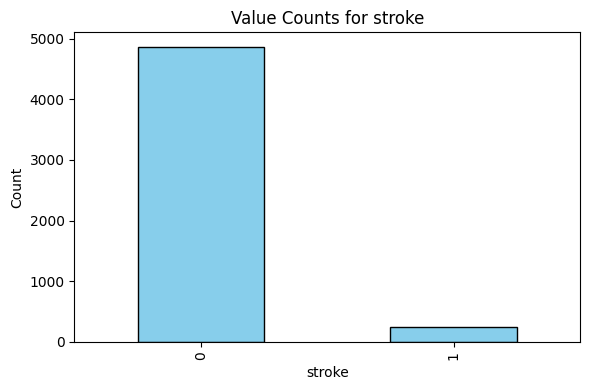

In [ ]:
# Visualization of categorical columns
object_columns = df.select_dtypes(include='object').columns # Select all columns with 'object' data type (categorical data)

# Iterate through each categorical column
for column in object_columns:
  # Value counts for each column
  value_counts = df[column].value_counts()
  print(value_counts)

  # Plot the frequency as a bar chart
  plt.figure(figsize=(6, 4))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title(f"Value Counts for {column}")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

* From the graphs, we can observe that most of the patients are healthy and have not had a stroke, which indicates an imbalanced dataset. Additionally, the majority of patients are women, and most have been married at some point in their lives or are currently married.

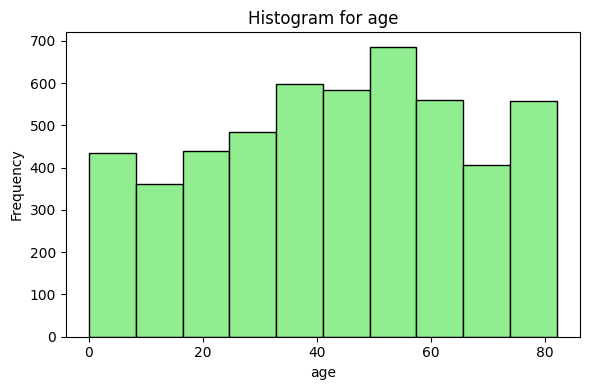

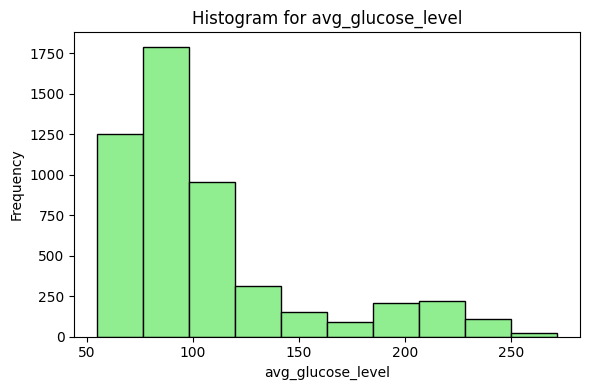

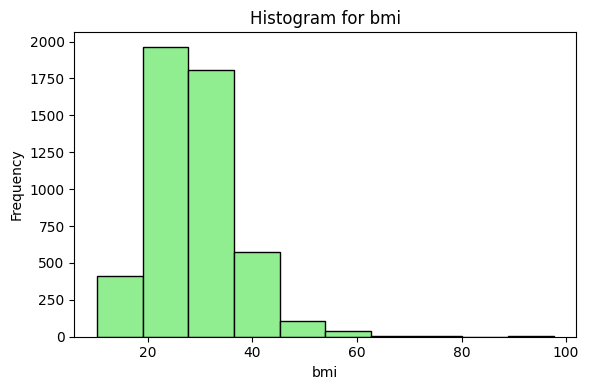

In [ ]:
# Visualization of numerical columns
float_columns = df.select_dtypes(include='float').columns # Select all columns with 'float' data type (numerical data)

# Plot histograms to visualize the distribution
for column in float_columns:
    plt.figure(figsize=(6, 4))
    df[column].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

* Based on the histograms, we can see that the age distribution is close to a normal distribution, with a peak around the age of 55. Most patients have an average glucose level between 70 and 100, which is considered a normal range according to medical literature. Additionally, with regard to BMI, most patients fall within the range of 20-30.

* The data has missing values in the BMI column. After some consideration, we decided to group all patients based on gender and average glucose level. Based on these groups, we filled the missing BMI values using the median value of each group.

In [ ]:
# Grouping by gender and glucose level, calculating the median BMI
df['Glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=4, labels=False)
median_bmi = df.groupby(['gender', 'Glucose_bin'])['bmi'].median().reset_index()
median_bmi = median_bmi.rename(columns={'bmi': 'Median_BMI'})

# Filling missing BMI values with the median BMI
df = pd.merge(df, median_bmi, on=['gender', 'Glucose_bin'], how='left')
df['bmi'] = df['bmi'].fillna(df['Median_BMI'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_bin,Median_BMI
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3,32.25
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.8,never smoked,1,2,31.80
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,27.90
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2,31.80
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,31.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.3,never smoked,0,0,27.30
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,27.40
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,27.30
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,2,30.70


In [ ]:
# After filling the missing values we remove the columns we created for grouping
df = df.drop(columns=['Glucose_bin', 'Median_BMI'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.8,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.3,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Check again for missing values
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
# Define a function to encode categorical columns into numerical values based on a given dictionary
def encode_columns(df, encoding_dict):
  df_copy = df.copy()
  for column, mapping in encoding_dict.items():
    if column in df_copy.columns:
      # Map the values in the column using the provided encoding
      df_copy[column] = df_copy[column].map(mapping).astype(int)
  return df_copy

# Define a dictionary with the encoding mappings for categorical columns
encoding_dict = {
  'gender': {'Male': 0, 'Female': 1, 'Other': 2},
  'ever_married': {'Yes': 1, 'No': 0},
  'work_type': {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4},
  'Residence_type': {'Urban': 0, 'Rural': 1},
  'smoking_status': {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}
}

# Apply the encoding function on the DataFrame
df_new = encode_columns(df, encoding_dict)
df_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,1,61.0,0,0,1,1,1,202.21,31.8,0,1
2,0,80.0,0,1,1,0,1,105.92,32.5,0,1
3,1,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,1,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,0,83.75,27.3,0,0
5106,1,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,1,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,0,51.0,0,0,1,0,1,166.29,25.6,2,0


# Features analysis and balance

### Correlation between the different features
As described in the article, we utilized Pearson's correlation coefficient to determine the relationships between various patient features. A correlation heatmap was created, where red indicates a positive correlation and blue indicates a negative correlation. The intensity of the color reflects the strength of the correlation, with deeper shades representing stronger relationships between the features.

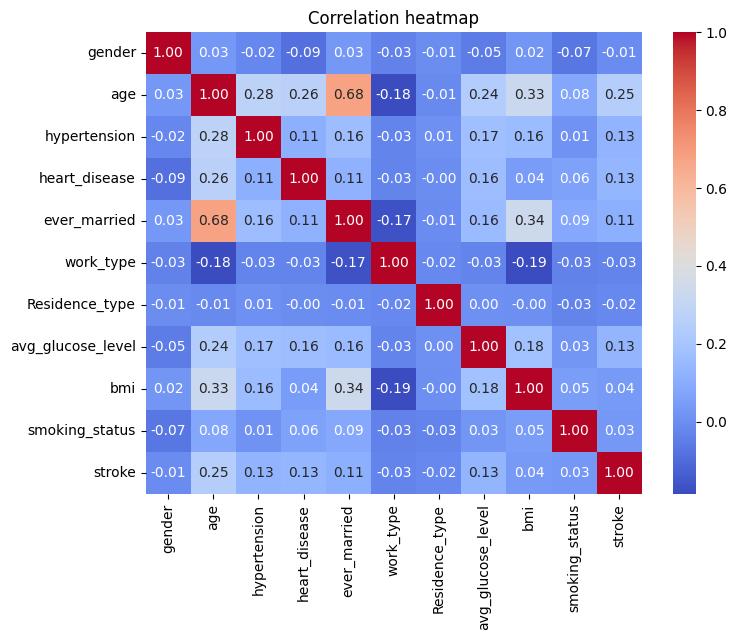

In [ ]:
# Calculate the Pearson correlation matrix
corr_mat = df_new.corr(method='pearson')

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

* Based on the heatmap, there is a strong positive correlation between age and marital status (ever_married), with a correlation value of 0.68.
However, for the other features, there is little to no correlation.

### PCA and Scree plot

Following the study's approach, we applied PCA to transform the dataset into uncorrelated principal components, capturing maximum variance. Features were standardized by scaling to have a mean of zero and a standard deviation of one. A scree plot was used to identify components explaining most of the variance.

In [ ]:
# split and normalize the data
def split_data(df, outcome):
  y = df[outcome].astype(int)
  X = df.drop(columns=[outcome])

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_new, 'stroke')

**explained_variance_ratio_**ndarray of shape (n_components,)
Percentage of variance explained by each of the selected components.
 If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

 A **scree plot** is a graph of eigenvalues against the corresponding PC number.

In [ ]:
# PCA and scree plot
def pca_analysis(df, X_train, status):
  # Perform PCA
  pca = PCA()
  X_pca = pca.fit_transform(X_train)

  # Plot the Scree plot
  explained_variance = pca.explained_variance_ratio_

  plt.figure(figsize=(8, 6))
  plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
  plt.title(f'Scree Plot - {status}')
  plt.xlabel('Principal Components')
  plt.ylabel('Explained Variance Ratio')
  plt.xticks(range(1, len(explained_variance) + 1))
  plt.grid(True)
  plt.show()

  # Displaying the explained variance percentages
  explained_variance_percent = explained_variance * 100
  print("Explained variance by each principal component:")
  for i, var in enumerate(explained_variance_percent, 1):
      print(f"PC{i}: {var:.2f}%")

  return X_pca, pca

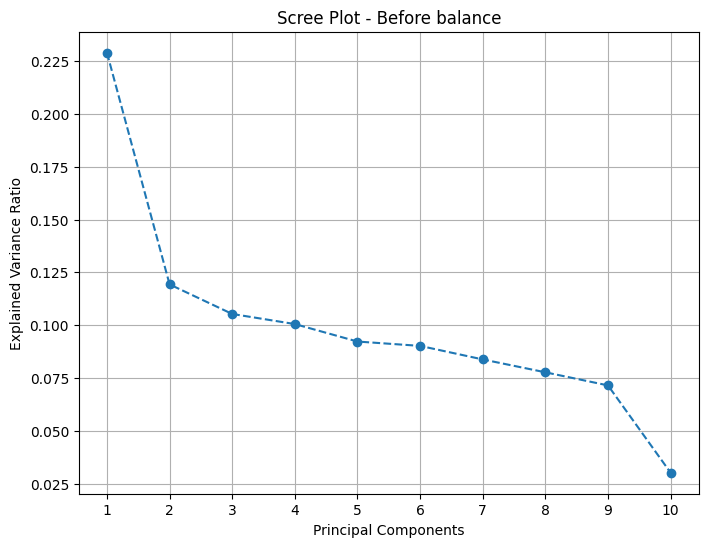

Explained variance by each principal component:
PC1: 22.89%
PC2: 11.93%
PC3: 10.53%
PC4: 10.06%
PC5: 9.23%
PC6: 9.02%
PC7: 8.38%
PC8: 7.77%
PC9: 7.16%
PC10: 3.03%


In [ ]:
# Call the func to analyse PCA
X_pca, pca = pca_analysis(df_new, X_train, 'Before balance')

In the paper, 10 principal components were derived, with 8 components explaining 88.2% of the variance.

In our analysis, as shown above, the variance explained by the top 8 principal components was 89.81%

---
We check the contributions of the different features in the first and second principal components.

In [ ]:
# Function to evaluate the contribution of the features to the PCA dimensions
def pca_contribution(pca, features):
  # Get the loadings for PC1 and PC2
  loadings = pca.components_.T[:, :2]

  # Create a DataFrame to display the loadings
  loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)

  # Get absolute values of the loadings
  abs_loadings_df = round(loadings_df.abs(), 2)

  # Sort the features by their absolute contribution for PC1
  sorted_pc1 = abs_loadings_df['PC1'].sort_values(ascending=False)

  # Sort the features by their absolute contribution for PC2
  sorted_pc2 = abs_loadings_df['PC2'].sort_values(ascending=False)

  # Display the sorted results
  print("Sorted Contributions of Features to PC1:")
  print(sorted_pc1)
  print("\nSorted Contributions of Features to PC2:")
  print(sorted_pc2)

In [ ]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

pca_contribution(pca, features)

Sorted Contributions of Features to PC1:
age                  0.56
ever_married         0.51
bmi                  0.38
avg_glucose_level    0.29
hypertension         0.28
heart_disease        0.25
work_type            0.22
smoking_status       0.12
gender               0.02
residence_type       0.02
Name: PC1, dtype: float64

Sorted Contributions of Features to PC2:
gender               0.58
heart_disease        0.47
work_type            0.40
avg_glucose_level    0.35
bmi                  0.23
hypertension         0.20
ever_married         0.20
smoking_status       0.17
age                  0.05
residence_type       0.01
Name: PC2, dtype: float64


In the paper, age and ever_married are among the most significant contributors to PC1, similar to our findings. For PC2, both analyses highlight gender and work_type as key contributors, with noticeable similarities in their ranking.

---
#### **Balance the data**

The original dataset
is unbalanced because there are more samples possessing negative
stroke labels, as compared to positive label stroke samples. We make
it balanced by considering all the positive stroke samples, and then
randomly picking equal number of negative stroke samples from the
rest. This will make a balanced dataset with equal number of positive
and negative stroke samples.

In [ ]:
# Count the number of samples before balancing
before_balancing = df_new['stroke'].value_counts()
print(f'Before balancing:\n{before_balancing}')

# Separate the dataset into stroke ans non-stroke cases
stroke_cases = df_new[df_new['stroke'] == 1]
non_stroke_cases = df_new[df_new['stroke'] == 0]

# Randomly select an equal number of non stroke cases as there are stroke cases
random_non_stroke = non_stroke_cases.sample(n=len(stroke_cases), random_state=42)

# Combine the stroke and selected non-stroke cases
balanced_df = pd.concat([stroke_cases, random_non_stroke])

# Shuffle the balanced dataset
balanced_df = shuffle(balanced_df, random_state=42).reset_index(drop=True)

# Count the number of samples after balancing
after_balancing = balanced_df['stroke'].value_counts()
print(f'\nAfter balancing:\n{after_balancing}')

balanced_df

Before balancing:
stroke
0    4861
1     249
Name: count, dtype: int64

After balancing:
stroke
0    249
1    249
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,57.0,0,0,1,0,1,86.67,39.0,1,0
1,0,63.0,0,0,1,0,1,228.56,27.4,0,1
2,1,79.0,0,0,1,0,0,97.73,21.5,3,1
3,0,72.0,1,0,1,1,1,185.49,37.1,0,1
4,0,77.0,0,0,1,1,1,162.14,32.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...
493,1,50.0,1,0,1,0,1,73.18,30.3,2,1
494,1,48.0,0,0,1,0,0,116.20,27.6,2,0
495,1,35.0,0,0,0,0,0,71.81,25.4,1,0
496,1,41.0,0,0,1,0,0,74.85,24.8,2,0


In [ ]:
# Split balanced data to train and test
X_train_bal, X_test_bal, y_train_bal, y_test_bal = split_data(balanced_df, 'stroke')

After balancing the dataset, we performed PCA and included a scree plot to examine whether the variance in the data and the features contributing most to it remained the same.

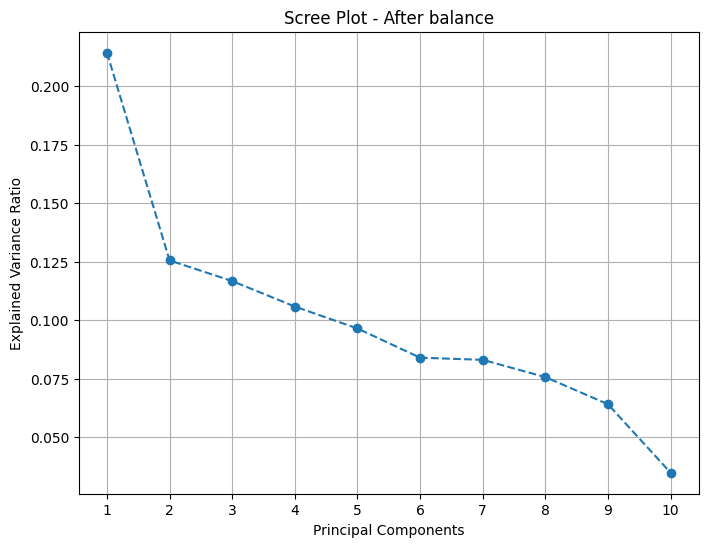

Explained variance by each principal component:
PC1: 21.43%
PC2: 12.55%
PC3: 11.67%
PC4: 10.58%
PC5: 9.64%
PC6: 8.39%
PC7: 8.30%
PC8: 7.56%
PC9: 6.40%
PC10: 3.47%


In [ ]:
# Apply the function to analyse PCA with balanced data
X_pca_bal, pca_bal = pca_analysis(balanced_df, X_train_bal, 'After balance')

In [ ]:
pca_contribution(pca_bal, features)

Sorted Contributions of Features to PC1:
age                  0.49
ever_married         0.46
bmi                  0.40
avg_glucose_level    0.37
hypertension         0.28
work_type            0.28
heart_disease        0.24
residence_type       0.13
smoking_status       0.12
gender               0.05
Name: PC1, dtype: float64

Sorted Contributions of Features to PC2:
heart_disease        0.51
gender               0.50
smoking_status       0.33
avg_glucose_level    0.30
bmi                  0.28
work_type            0.27
residence_type       0.26
ever_married         0.24
hypertension         0.08
age                  0.02
Name: PC2, dtype: float64


We observed that, consistent with the findings reported in the paper, the contributions of the features remained largely unaffected after balancing the dataset. Age and ever_married had the highest contributions to PC1, while gender and heart disease contributed the most to PC2.

# Models

In [ ]:
# A function for evaluating model preformance
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f_score = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    miss_rate = fn / (fn + tp)
    fallout_rate = fp / (fp + tn)

    return precision, recall, f_score, accuracy, miss_rate, fallout_rate

Our goal was to identify the best hyperparameters for each model. To achieve this, as learned in class, we created a function that performs grid search to find the hyperparameters that yield the optimal model.

In [ ]:
def grid_search_func(X_train, y_train, X_test, y_test, models, param_grids):

    # Initialize an empty list to store results
    results_list = []

    # Loop through each model and perform grid search
    for model_name in models:
        grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and make predictions
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Get best parameters for the model
        best_params = grid_search.best_params_
        print(f"{model_name}'s best parameters:{best_params}")

        # Calculate the metrics for the best model
        precision, recall, f_score, accuracy, miss_rate, fallout_rate = calculate_metrics(y_test, y_pred)

        results = {
            'Model': model_name,
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F-Score': round(f_score, 2),
            'Accuracy': round(accuracy, 2),
            'Miss rate': round(miss_rate, 2),
            'Fall-out rate': round(fallout_rate, 2),
        }

        # Append the results to the list
        results_list.append(results)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results_list)

    return results_df

First, we tested three models as done in the paper: Decision Tree, Random Forest, and Neural Network. For each model, we selected hyperparameters to search for the best ones.

In [ ]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

As outlined in the paper, we initially evaluated the models on the balanced dataset using all features, and then tested them on the balanced dataset reduced to 2 and 8 principal components using PCA. This approach allowed us to assess the models' performance across different levels of feature reduction.

For each model, we used the grid search function to find the best hyperparameters and displayed them. Additionally, we presented the accuracy and other evaluation metrics for each model with the optimal hyperparameters.

In [ ]:
# Print the results
results_df = grid_search_func(X_train_bal, y_train_bal, X_test_bal, y_test_bal, models, param_grids)
results_df

Decision Tree's best parameters:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Random Forest's best parameters:{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Neural Network's best parameters:{'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,Decision Tree,0.70,0.66,0.68,0.66,0.34,0.34
1,Random Forest,0.75,0.77,0.76,0.73,0.23,0.31
2,Neural Network,0.75,0.77,0.76,0.73,0.23,0.31


In [ ]:
# Select the first 2 principal components
X_train_pca_2 = X_pca_bal[:, :2]
X_test_pca_2 = pca_bal.transform(X_test_bal)[:, :2]

# Select the first 8 principal components
X_train_pca_8 = X_pca_bal[:, :8]
X_test_pca_8 = pca_bal.transform(X_test_bal)[:, :8]


In [ ]:
print("Training models with the first 2 principal components:")
results_pca_2 = grid_search_func(X_train_pca_2, y_train_bal, X_test_pca_2, y_test_bal, models, param_grids)
results_pca_2

Training models with the first 2 principal components:
Decision Tree's best parameters:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Random Forest's best parameters:{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Neural Network's best parameters:{'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,Decision Tree,0.63,0.49,0.55,0.57,0.51,0.34
1,Random Forest,0.71,0.65,0.68,0.66,0.35,0.32
2,Neural Network,0.74,0.66,0.70,0.69,0.34,0.28


In [ ]:
print("Training models with the first 8 principal components:")
results_pca_8 = grid_search_func(X_train_pca_8, y_train_bal, X_test_pca_8, y_test_bal, models, param_grids)
results_pca_8

Training models with the first 8 principal components:
Decision Tree's best parameters:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Random Forest's best parameters:{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Neural Network's best parameters:{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'sgd'}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,Decision Tree,0.61,0.51,0.56,0.55,0.49,0.40
1,Random Forest,0.76,0.74,0.75,0.73,0.26,0.28
2,Neural Network,0.77,0.77,0.77,0.75,0.23,0.28


Additionally, we tested two other models: SVM and Gradient Boosting, with the aim of finding the best model for stroke prediction on our data. As before, we searched for the best hyperparameters and printed the evaluation metrics for each model, both on all features and after dimensionality reduction using PCA with 2 and 8 components

In [ ]:
# Define the models
new_models = {
        'SVM': SVC(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
        }

# Define parameter grids for each model
new_param_grids = {
        'SVM': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
        },
        'Gradient Boosting': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }

In [ ]:
# Print the results table
results_df = grid_search_func(X_train_bal, y_train_bal, X_test_bal, y_test_bal, new_models, new_param_grids)
results_df

SVM's best parameters:{'C': 0.1, 'kernel': 'linear'}
Gradient Boosting's best parameters:{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,SVM,0.75,0.77,0.76,0.73,0.23,0.31
1,Gradient Boosting,0.75,0.72,0.73,0.71,0.28,0.29


In [ ]:
print("Training models with the first 2 principal components:")
results_pca_2 = grid_search_func(X_train_pca_2, y_train_bal, X_test_pca_2, y_test_bal, new_models, new_param_grids)
results_pca_2

Training models with the first 2 principal components:
SVM's best parameters:{'C': 10, 'kernel': 'poly'}
Gradient Boosting's best parameters:{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,SVM,0.64,0.71,0.67,0.62,0.29,0.49
1,Gradient Boosting,0.71,0.60,0.65,0.65,0.40,0.29


In [ ]:
print("Training models with the first 8 principal components:")
results_pca_8 = grid_search_func(X_train_pca_8, y_train_bal, X_test_pca_8, y_test_bal, new_models, new_param_grids)
results_pca_8

Training models with the first 8 principal components:
SVM's best parameters:{'C': 1, 'kernel': 'linear'}
Gradient Boosting's best parameters:{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


,Model,Precision,Recall,F-Score,Accuracy,Miss rate,Fall-out rate
0,SVM,0.75,0.76,0.75,0.73,0.24,0.31
1,Gradient Boosting,0.72,0.74,0.73,0.70,0.26,0.35
